In [ ]:
IMAGE_PATH = r"C:\Users\nam\Downloads\target0001.jpeg"

## Shear 각도별 비교

✅ 이미지 로드 성공: (2048, 2048)

--- Shear(기울기) 1도 ~ 20도 생성 시작 ---
[1°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_1deg.jpg
[2°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_2deg.jpg
[3°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_3deg.jpg
[4°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_4deg.jpg
[5°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_5deg.jpg
[6°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_6deg.jpg
[7°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_7deg.jpg
[8°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_8deg.jpg
[9°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_9deg.jpg
[10°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_10deg.jpg
[11°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_11deg.jpg
[12°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_12deg.jpg
[13°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_13deg.jpg
[14°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_14deg.jpg
[15°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_15deg.jpg
[16°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_16deg.jpg
[17°] 저장 완료 -> C:\Users\nam\Downloads\shear_x_17deg.jpg
[18°]

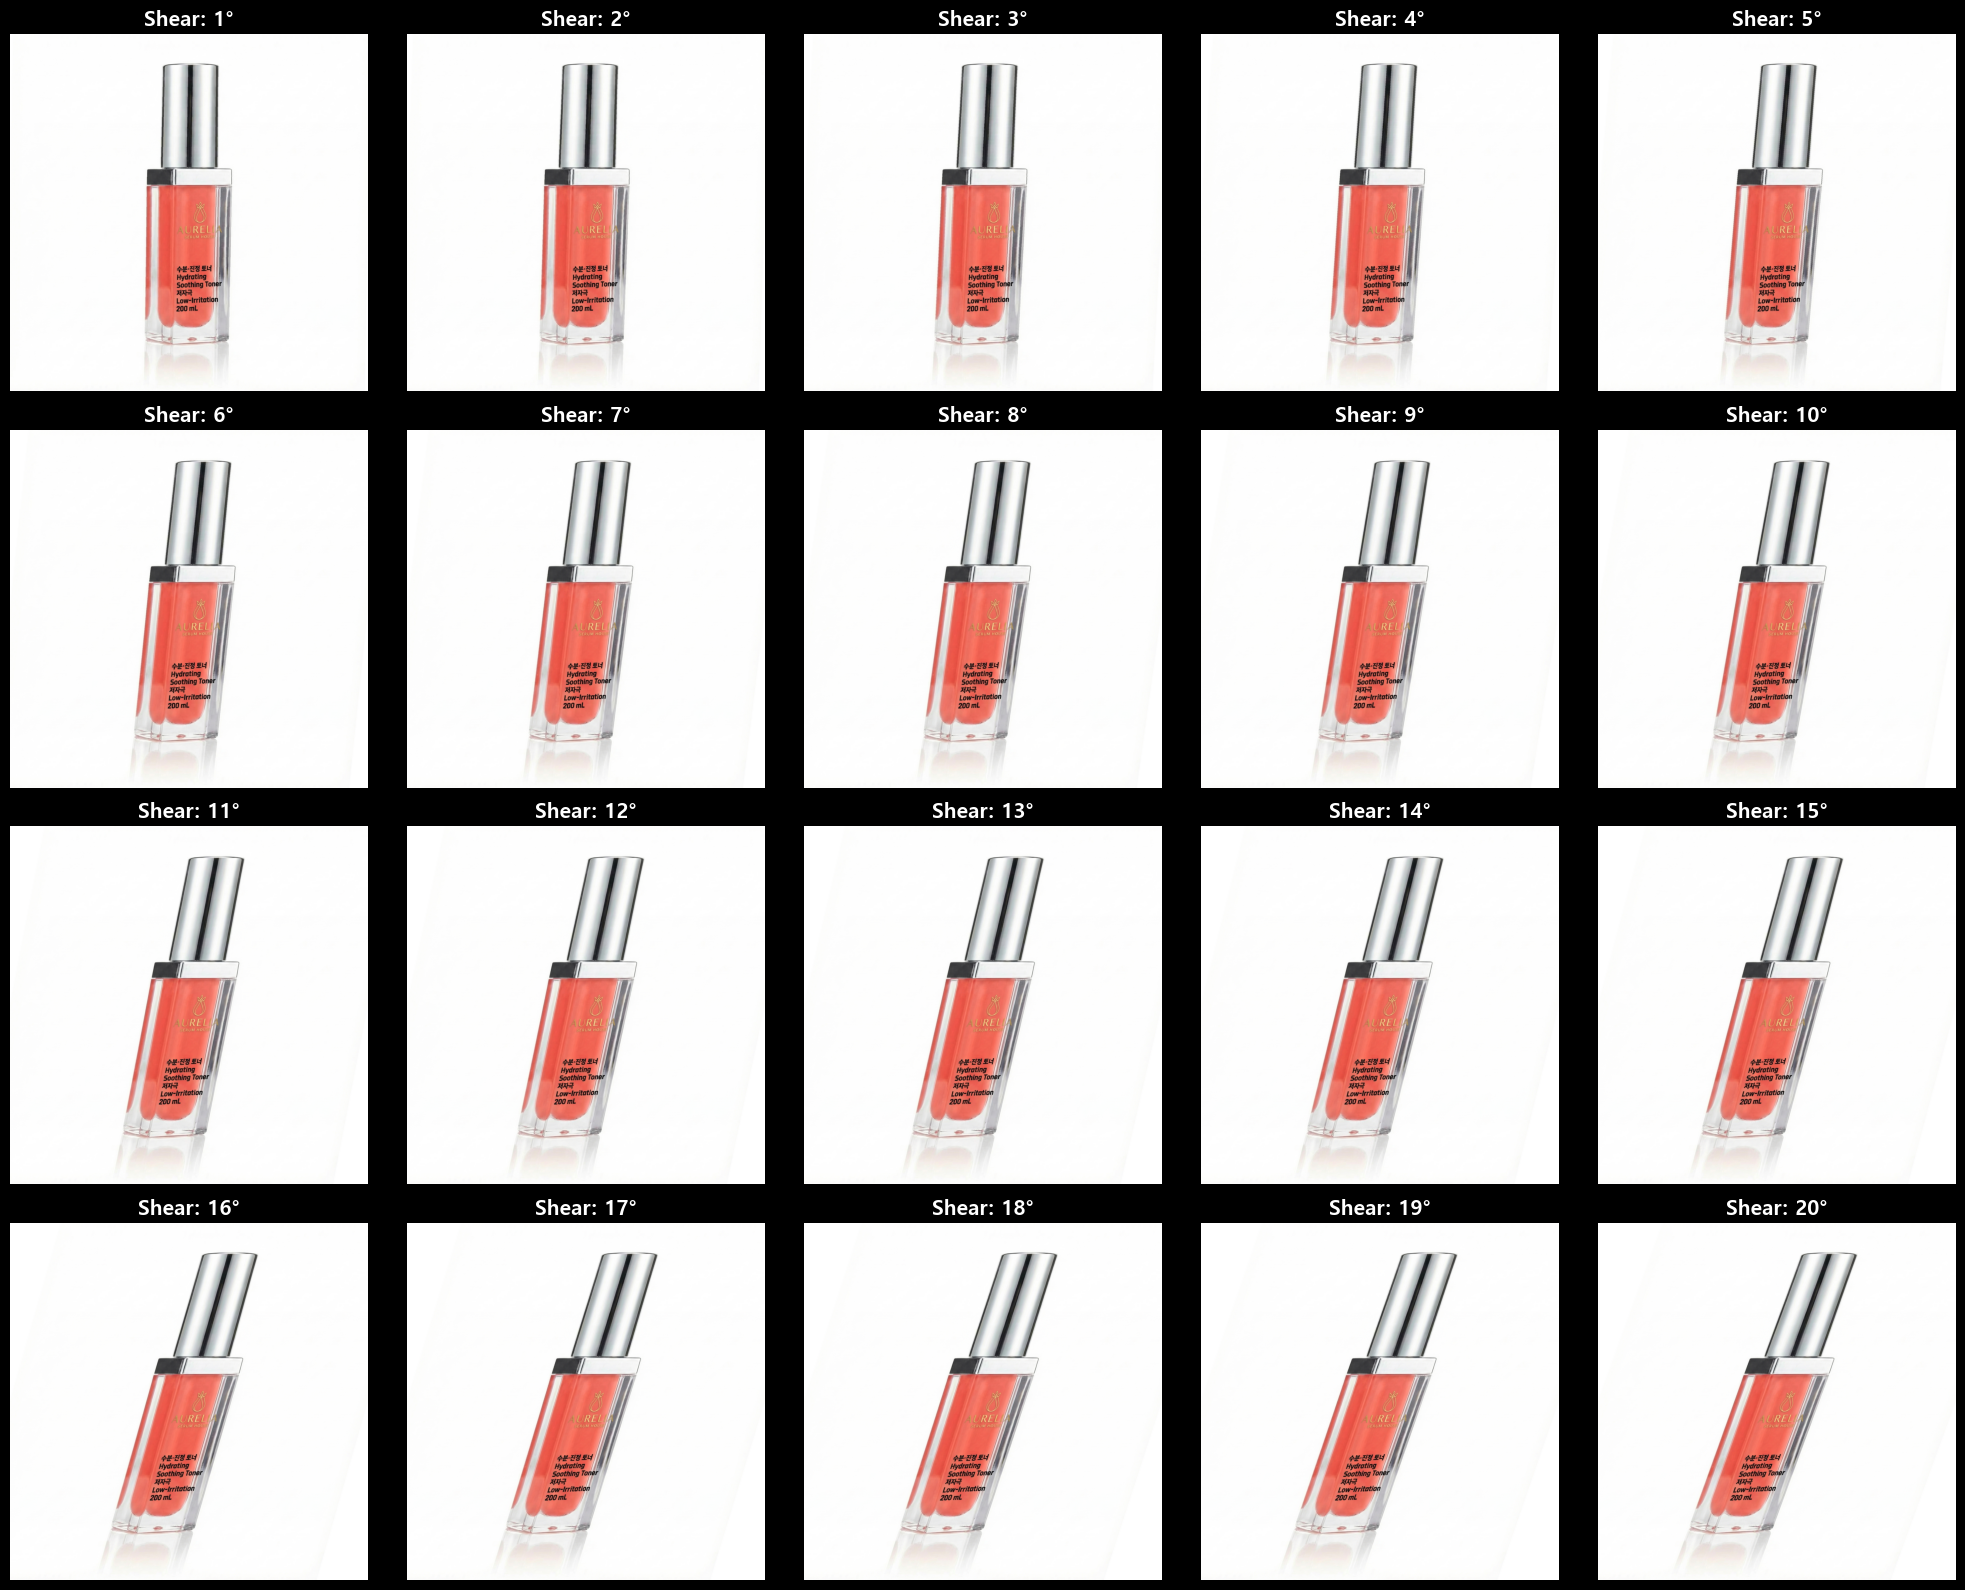

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import v2
import platform

# ========================================================
# [설정] 테스트할 이미지 경로를 입력하세요.
# ========================================================
IMAGE_PATH = r"C:\Users\nam\Desktop\Augmentation\TEST_Ref_1bcc43f9_Ref_4a997140_Giants-Bold_front_0001.png"
OUTPUT_DIR = r"C:\Users\nam\Downloads"

# -----------------------------------------------------------
# [시각화 설정] 한글 폰트 및 그래프 사이즈
# -----------------------------------------------------------
system_name = platform.system()
if system_name == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

def run_shear_experiment():
    # 1. 이미지 로드
    if not os.path.exists(IMAGE_PATH):
        print(f"❌ 오류: 파일을 찾을 수 없습니다: {IMAGE_PATH}")
        return

    try:
        original_img = Image.open(IMAGE_PATH).convert("RGB")
        print(f"✅ 이미지 로드 성공: {original_img.size}")
    except Exception as e:
        print(f"❌ 이미지 열기 실패: {e}")
        return

    # 2. 저장 폴더 생성
    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)

    # 3. 그래프 설정 (4행 5열 = 20개)
    fig, axes = plt.subplots(4, 5, figsize=(20, 16))
    axes = axes.flatten()

    print("\n--- Shear(기울기) 1도 ~ 20도 생성 시작 ---")

    for i in range(1, 21): # 1부터 20까지 반복
        angle = i

        # -------------------------------------------------------
        # [핵심] Shear 적용
        # shear=(min, max)에 같은 값을 넣으면 고정된 각도로 적용됩니다.
        # fill=255: 기울어지면서 생긴 빈 공간을 흰색(255)으로 채움 (문서 배경용)
        # -------------------------------------------------------
        transform = v2.RandomAffine(
            degrees=0,
            shear=(angle, angle),
            fill=255  # 검은색 배경을 원하시면 0으로 바꾸세요
        )

        # 변환 적용
        aug_img = transform(original_img)

        # 파일로 저장
        save_name = f"shear_x_{angle}deg.jpg"
        save_path = os.path.join(OUTPUT_DIR, save_name)
        aug_img.save(save_path)

        # 시각화 (그래프 그리기)
        axes[i-1].imshow(aug_img)
        axes[i-1].set_title(f"Shear: {angle}°", fontsize=15, fontweight='bold')
        axes[i-1].axis('off')

        print(f"[{angle}°] 저장 완료 -> {save_path}")

    print("\n✅ 모든 작업 완료! 그래프를 출력합니다.")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    run_shear_experiment()

## 다양한 Augmentation 방법들

In [14]:
import os
import torch
import torch.nn as nn
from PIL import Image
from torchvision.transforms import v2

# ========================================================
# [설정] 이미지 경로를 본인의 파일 경로로 수정하세요.
# ========================================================
IMAGE_PATH = r"C:\Users\nam\Downloads\target0001.jpeg"
OUTPUT_DIR = r"C:\Users\nam\Downloads"

# -----------------------------------------------------------
# [커스텀 Transform] 가우시안 노이즈 추가 클래스
# -----------------------------------------------------------
class AddGaussianNoise(nn.Module):
    def __init__(self, mean=0., std=0.03):
        super().__init__()
        self.mean = mean
        self.std = std

    def forward(self, img_tensor):
        noise = torch.randn_like(img_tensor) * self.std + self.mean
        noisy_img = img_tensor + noise
        return torch.clamp(noisy_img, 0., 1.)

def get_noise_transform(std):
    return v2.Compose([
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        AddGaussianNoise(std=std),
        v2.ToPILImage()
    ])

# ========================================================
# [OK 그룹] 양품으로 인정할 범위
# ========================================================
ok_aug_dict = {
    "Original": v2.Identity(),
    "Rot_15": v2.RandomRotation(degrees=15),
    "Trans_Shear": v2.RandomAffine(degrees=0, translate=(0.1, 0.1), shear=10),
    "Jitter_Light": v2.ColorJitter(contrast=0.2, saturation=0.1, hue=0.0),
    "Noise_Low": get_noise_transform(std=0.03),
}

# ========================================================
# [NG 그룹] 불량으로 학습시킬 데이터
# ========================================================
ng_aug_dict = {
    "Equalize": v2.RandomEqualize(p=1.0),
    "Blur_Heavy": v2.GaussianBlur(kernel_size=(5, 9), sigma=(2.0, 5.0)),
    "Shear_Heavy": v2.RandomAffine(degrees=0, shear=40),
    "Solarize": v2.RandomSolarize(threshold=128, p=1.0),
}


def save_augs_clean_names():
    if not os.path.exists(IMAGE_PATH):
        print(f"❌ 오류: 파일을 찾을 수 없습니다: {IMAGE_PATH}")
        return

    try:
        original_img = Image.open(IMAGE_PATH).convert("RGB")
        print(f"✅ 원본 이미지 로드 성공: {original_img.size}")
    except Exception as e:
        print(f"❌ 이미지 열기 실패: {e}")
        return

    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)

    # -----------------------------------------------------------
    # 파일명 전처리: 원본 파일명의 _ 를 @ 로 변경
    # -----------------------------------------------------------
    file_name_with_ext = os.path.basename(IMAGE_PATH)
    base_name, _ = os.path.splitext(file_name_with_ext)
    base_name_clean = base_name.replace("_", "@")

    print(f"\n--- 증강 시작 (Prefix: {base_name_clean}) ---")

    # -----------------------------------------------------------
    # 내부 함수: 증강 적용 및 저장 (category 파라미터는 로그용으로만 사용)
    # -----------------------------------------------------------
    def apply_and_save(dictionary, log_category):
        for name, transform in dictionary.items():
            try:
                # 증강 적용
                aug_img = transform(original_img)

                # 증강 이름 정리 (Noise_Low -> Noise@Low)
                aug_name_clean = name.replace("_", "@").replace(" ", "@")

                # [변경점] 파일명 생성 시 category(OK/NG) 제외
                # 최종 포맷: 원본명@증강명.jpg
                save_filename = f"{base_name_clean}@{aug_name_clean}.jpg"
                save_path = os.path.join(OUTPUT_DIR, save_filename)

                # 저장
                if isinstance(aug_img, Image.Image):
                    aug_img.save(save_path)
                else:
                    v2.ToPILImage()(aug_img).save(save_path)

                # 콘솔 로그에는 OK/NG 구분을 남겨둠 (확인용)
                print(f"[{log_category}] Saved: {save_filename}")

            except Exception as e:
                print(f"⚠️ [{log_category}] {name} 처리 중 오류: {e}")

    # 두 그룹의 딕셔너리를 순차적으로 실행
    apply_and_save(ok_aug_dict, "OK Group")
    apply_and_save(ng_aug_dict, "NG Group")

    print("\n✅ 모든 작업이 완료되었습니다!")

if __name__ == "__main__":
    save_augs_clean_names()

✅ 원본 이미지 로드 성공: (2048, 2048)

--- 증강 시작 (Prefix: target0001) ---
[OK Group] Saved: target0001@Original.jpg
[OK Group] Saved: target0001@Rot@15.jpg
[OK Group] Saved: target0001@Trans@Shear.jpg
[OK Group] Saved: target0001@Jitter@Light.jpg
[OK Group] Saved: target0001@Noise@Low.jpg
[NG Group] Saved: target0001@Equalize.jpg
[NG Group] Saved: target0001@Blur@Heavy.jpg
[NG Group] Saved: target0001@Shear@Heavy.jpg
[NG Group] Saved: target0001@Solarize.jpg

✅ 모든 작업이 완료되었습니다!
